In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

Виконуємо завантаження даних

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Виконаємо побудову та проведемо навчання базової RNN моделі

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [4]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - acc: 0.5815 - loss: 0.6658 - val_acc: 0.7570 - val_loss: 0.5258
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - acc: 0.8112 - loss: 0.4370 - val_acc: 0.7726 - val_loss: 0.4809
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - acc: 0.8549 - loss: 0.3501 - val_acc: 0.8240 - val_loss: 0.4055
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - acc: 0.9067 - loss: 0.2430 - val_acc: 0.8296 - val_loss: 0.3924
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - acc: 0.9315 - loss: 0.1832 - val_acc: 0.8430 - val_loss: 0.4522
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 102ms/step - acc: 0.9514 - loss: 0.1405 - val_acc: 0.8500 - val_loss: 0.4203
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - acc: 0.9772 - loss: 0.0749 - val_acc: 0.8394 - val_loss: 0.4775
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - acc: 0.9870 - loss: 0.0470 - val_acc: 0.8298 - val_loss: 0.5524
Epoch 9/10
157/157 ━━━━━━━━━━━━━

In [10]:
import matplotlib.pyplot as plt

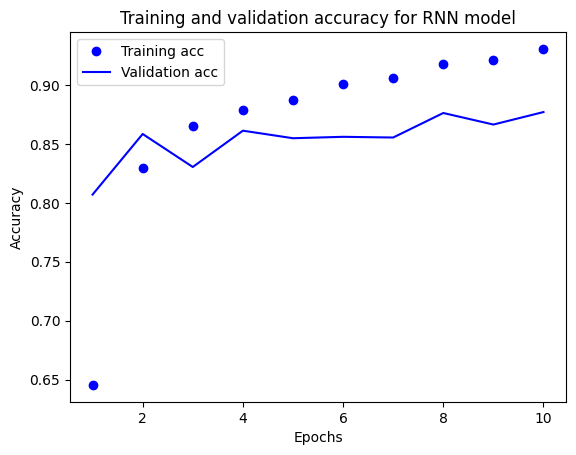

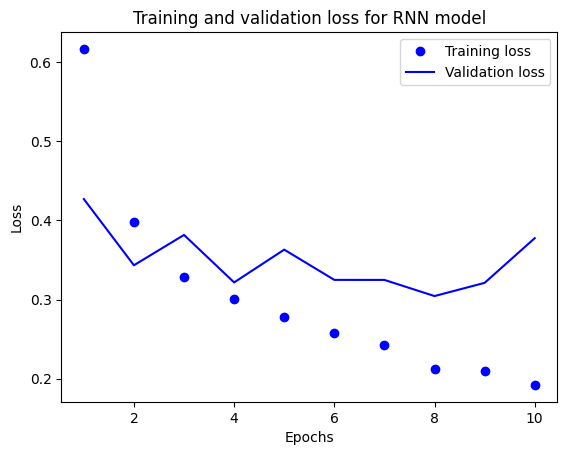

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy for RNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for RNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [21]:
print("\nRNN model test accuracy and loss:")
test_loss_rnn, test_acc_rnn = model.evaluate(input_test, y_test)
print("RNN model test accuracy:", test_acc_rnn)
print("RNN model test loss:", test_loss_rnn)


RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - acc: 0.8660 - loss: 0.4207
RNN model test accuracy: 0.8676400184631348
RNN model test loss: 0.40992283821105957


Тепер виконаємо побудову і навчання LSTM моделі

In [22]:
from tensorflow.keras.layers import LSTM, Bidirectional

In [23]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_lstm = model_lstm.fit(input_train, y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - acc: 0.5810 - loss: 0.6692 - val_acc: 0.8188 - val_loss: 0.4397
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 252ms/step - acc: 0.8149 - loss: 0.4255 - val_acc: 0.7408 - val_loss: 0.5482
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 256ms/step - acc: 0.8613 - loss: 0.3345 - val_acc: 0.8568 - val_loss: 0.3411
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 260ms/step - acc: 0.8797 - loss: 0.3043 - val_acc: 0.8620 - val_loss: 0.3302
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - acc: 0.8952 - loss: 0.2682 - val_acc: 0.8636 - val_loss: 0.3267
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - acc: 0.9056 - loss: 0.2446 - val_acc: 0.8728 - val_loss: 0.3051
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 260ms/step - acc: 0.9111 - loss: 0.2275 - val_acc: 0.8418 - val_loss: 0.4295
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 270ms/step - acc: 0.9237 - loss: 0.2085 - val_acc: 0.8804 - val_loss: 0.2965
Epoch 9/10
157/157 ━━━━━━━━━━━━━

Виведемо метрики для визначення ефективності моделі LSTM

In [8]:
import matplotlib.pyplot as plt

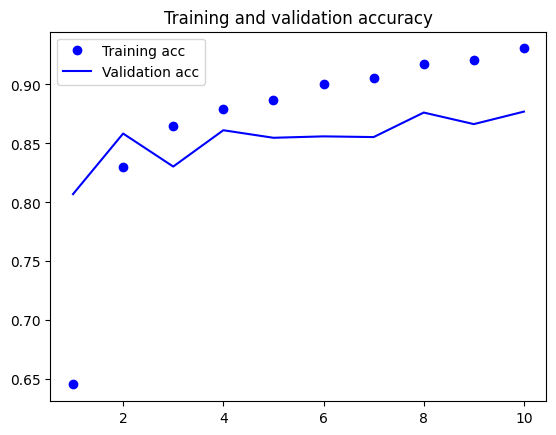

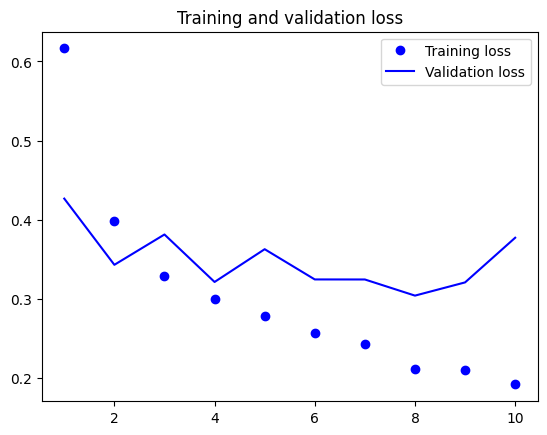

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [24]:
print("\nLSTM model test accuracy and loss:")
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(input_test, y_test)
print("LSTM model test accuracy:", test_acc_lstm)
print("LSTM model test loss:", test_loss_lstm)


LSTM model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - acc: 0.8839 - loss: 0.3202
LSTM model test accuracy: 0.8849999904632568
LSTM model test loss: 0.31637734174728394


Побудуємо також двосторонню рекурентну нейронну мережу (Bidirectional RNN)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense

In [25]:
model_bidirectional_rnn = Sequential()
model_bidirectional_rnn.add(Embedding(max_features, 32))
model_bidirectional_rnn.add(Bidirectional(SimpleRNN(32)))
model_bidirectional_rnn.add(Dense(1, activation='sigmoid'))

model_bidirectional_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bidirectional_rnn = model_bidirectional_rnn.fit(input_train, y_train,
                                                        epochs=10,
                                                        batch_size=128,
                                                        validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - acc: 0.5454 - loss: 0.6822 - val_acc: 0.7554 - val_loss: 0.5143
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - acc: 0.7913 - loss: 0.4707 - val_acc: 0.8122 - val_loss: 0.4291
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - acc: 0.8507 - loss: 0.3643 - val_acc: 0.8210 - val_loss: 0.3952
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - acc: 0.8799 - loss: 0.3032 - val_acc: 0.8154 - val_loss: 0.4757
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - acc: 0.9024 - loss: 0.2548 - val_acc: 0.8366 - val_loss: 0.4528
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - acc: 0.9114 - loss: 0.2384 - val_acc: 0.8032 - val_loss: 0.4453
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - acc: 0.9383 - loss: 0.1760 - val_acc: 0.8582 - val_loss: 0.3972
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - acc: 0.9565 - loss: 0.1256 - val_acc: 0.8150 - val_loss: 0.4900
Epoch 9/10
157/157 ━━━━━━━━━━━━━

Виведемо графік ефективності для двосторонньої рекурентної моделі

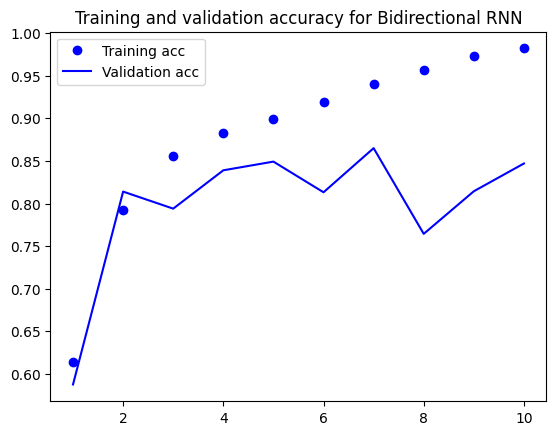

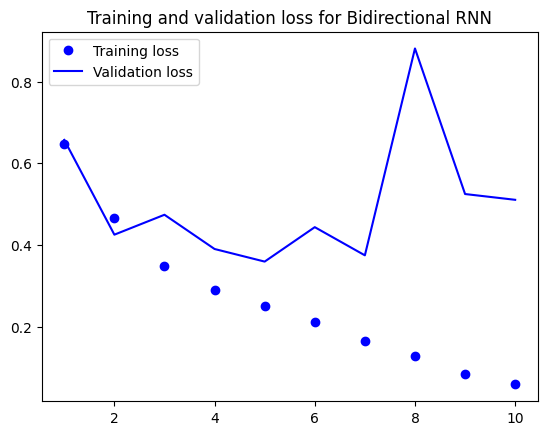

In [16]:
acc_bidirectional_rnn = history_bidirectional_rnn.history['acc']
val_acc_bidirectional_rnn = history_bidirectional_rnn.history['val_acc']
loss_bidirectional_rnn = history_bidirectional_rnn.history['loss']
val_loss_bidirectional_rnn = history_bidirectional_rnn.history['val_loss']

epochs = range(1, len(acc_bidirectional_rnn) + 1)

plt.plot(epochs, acc_bidirectional_rnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_bidirectional_rnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Bidirectional RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss_bidirectional_rnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_bidirectional_rnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Bidirectional RNN')
plt.legend()

plt.show()

In [26]:
print("\nBidirectional RNN model test accuracy and loss:")
test_loss_bidirectional_rnn, test_acc_bidirectional_rnn = model_bidirectional_rnn.evaluate(input_test, y_test)
print("Bidirectional RNN model test accuracy:", test_acc_bidirectional_rnn)
print("Bidirectional RNN model test loss:", test_loss_bidirectional_rnn)


Bidirectional RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - acc: 0.8319 - loss: 0.5227
Bidirectional RNN model test accuracy: 0.834119975566864
Bidirectional RNN model test loss: 0.5218986868858337


Також побудуємо глибоку рекурентну нейронну мережу (Deep RNN)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [27]:
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 32))
model_deep_rnn.add(SimpleRNN(32, return_sequences=True))
model_deep_rnn.add(SimpleRNN(32))
model_deep_rnn.add(Dense(1, activation='sigmoid'))

model_deep_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_deep_rnn = model_deep_rnn.fit(input_train, y_train,
                                      epochs=10,
                                      batch_size=128,
                                      validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 36s 211ms/step - acc: 0.5343 - loss: 0.6855 - val_acc: 0.7898 - val_loss: 0.4637
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 33s 209ms/step - acc: 0.7981 - loss: 0.4428 - val_acc: 0.7954 - val_loss: 0.4471
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 217ms/step - acc: 0.8727 - loss: 0.3077 - val_acc: 0.8638 - val_loss: 0.3727
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - acc: 0.9189 - loss: 0.2092 - val_acc: 0.8580 - val_loss: 0.4685
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - acc: 0.9579 - loss: 0.1180 - val_acc: 0.6990 - val_loss: 0.9200
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 216ms/step - acc: 0.9755 - loss: 0.0766 - val_acc: 0.8282 - val_loss: 0.5536
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - acc: 0.9910 - loss: 0.0325 - val_acc: 0.8194 - val_loss: 0.7047
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 216ms/step - acc: 0.9935 - loss: 0.0196 - val_acc: 0.7620 - val_loss: 0.9602
Epoch 9/10
157/157 ━━━━━━━━━━━━━

Виведемо графіки ефективності також для глибокої рекурентної моделі

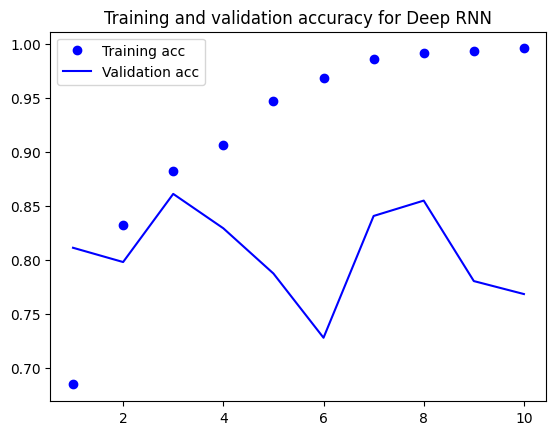

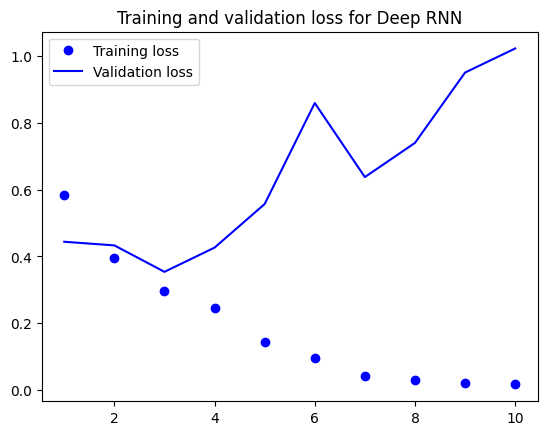

In [17]:
acc_deep_rnn = history_deep_rnn.history['acc']
val_acc_deep_rnn = history_deep_rnn.history['val_acc']
loss_deep_rnn = history_deep_rnn.history['loss']
val_loss_deep_rnn = history_deep_rnn.history['val_loss']

epochs = range(1, len(acc_deep_rnn) + 1)

plt.plot(epochs, acc_deep_rnn, 'bo', label='Training acc')
plt.plot(epochs, val_acc_deep_rnn, 'b', label='Validation acc')
plt.title('Training and validation accuracy for Deep RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss_deep_rnn, 'bo', label='Training loss')
plt.plot(epochs, val_loss_deep_rnn, 'b', label='Validation loss')
plt.title('Training and validation loss for Deep RNN')
plt.legend()

plt.show()

In [28]:
print("\nDeep RNN model test accuracy and loss:")
test_loss_deep_rnn, test_acc_deep_rnn = model_deep_rnn.evaluate(input_test, y_test)
print("Deep RNN model test accuracy:", test_acc_deep_rnn)
print("Deep RNN model test loss:", test_loss_deep_rnn)


Deep RNN model test accuracy and loss:
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - acc: 0.7389 - loss: 1.2610
Deep RNN model test accuracy: 0.7355599999427795
Deep RNN model test loss: 1.290126085281372


В цьому завданні ми працювали із класифікацією рецензій датасетоу imdb, де нам рекомендється створити рекурентну нейронну мережу.

Ми спробуввали створити мережі:



**Базова RNN (Recurrent Neural Network)** : Вона є досить нескладно., але відома тим. що містить певний недолік - має тенденцію до проблеми зниклого градієнта. Саме тому вона може давати гірший результат в задачах, де існують довгострокові заленості.

В ході завдання ми отримали метрики ефективності даної моделі :

RNN model test accuracy: 0.8676400184631348

RNN model test loss: 0.40992283821105957




**LSTM (Long Short-Term Memory)** : Використовується для моделювання посліовностей, вона дозволяє зрозуміти та використати довгострокові залежності в них. Це дуже доречно при роботі з текстовими даними, де можуть бути довгострокові залежності між словами та фразами.

Провівши аналіз ми отримали метрики ефективності даної моделі :

LSTM model test accuracy: 0.8849999904632568

LSTM model test loss: 0.31637734174728394




**BRNN (Bidirectional RNN)** : Двостороння RNN корисна при послідовностях, які мають контекст в обидві сторони. Але так як ми маємо справу з текстовими даними, то ця особливість не покаже тої ефективності.

Тут ми отримали метрики ефективності : 

Bidirectional RNN model test accuracy: 0.834119975566864

Bidirectional RNN model test loss: 0.5218986868858337



**DRNN (Deep RNN)** : Глибока RNN вирішує проблему з зникненнм градієнта, і дозволяє моделі поглибитись у складніші залежності в даних. Але так як ми маємо справу з текстовими даними, додавання додаткових шарів може призвести до перенавчання.

Метрики ефективності даної моделі становлять : 

Deep RNN model test accuracy: 0.7355599999427795

Deep RNN model test loss: 1.290126085281372



**Висновок** : Ознайомившись з результатами ефективності різних моделей ми досить чудово ознайомилися з наглядною роботою цих моделей на даному типі датасету. 

Найефективнішою для даного типу задач показала себе LSTM (Long Short-Term Memory), що дала кращий результат ніж базова RNN (Recurrent Neural Network).

Використання ж Двосторонньої та Глибокої RNN для такої задач не проявляє такої ефективності, оскільки створені для більш складніших задач з більшою кількістю даних.